In [1]:
import numpy as np

In [2]:
ice = np.zeros((6, 6))
ice[2, 3] = 100
ice[3, 3] = 100
ice[5, 4] = 100
ice

array([[  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0., 100.,   0.,   0.],
       [  0.,   0.,   0., 100.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0., 100.,   0.]])

In [3]:
X_train = np.vstack(ice.T.nonzero()).T
X_train.shape

(3, 2)

In [4]:
from sklearn.mixture import GaussianMixture

In [5]:
import sklearn
sklearn.__version__

'1.0.2'

In [6]:
clf = GaussianMixture(
    n_components=3, 
    covariance_type="spherical", 
    init_params='kmeans', 
    means_init=X_train,
    precisions_init=np.array([200000] * len(X_train))
)
clf.fit(X_train)

GaussianMixture(covariance_type='spherical',
                means_init=array([[3., 2.],
       [3., 3.],
       [4., 5.]]),
                n_components=3,
                precisions_init=array([200000., 200000., 200000.]))

In [7]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [8]:
# display predicted scores by the model as a contour plot
x = np.linspace(0, 6)
y = np.linspace(0, 6)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

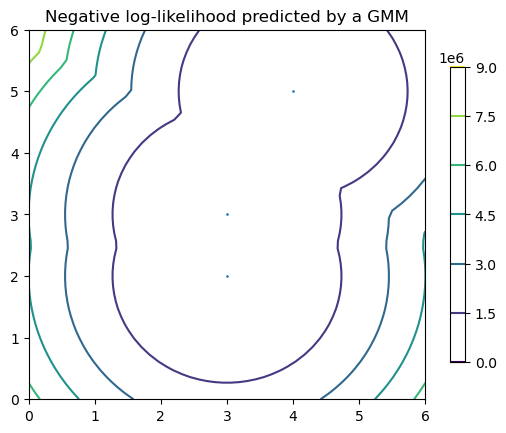

In [9]:
CS = plt.contour(
    X, Y, Z, #norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
)


CB = plt.colorbar(CS, shrink=0.8, extend="both")
plt.scatter(X_train[:, 0], X_train[:, 1], 0.8)

plt.title("Negative log-likelihood predicted by a GMM")
plt.axis("tight")
plt.show()

In [10]:
rng = np.random.default_rng()

rubble = (rng.random((6, 6)) * 100).astype(int)

rubble[ice.nonzero()] = 0
rubble

array([[ 7, 55, 74, 79, 66, 90],
       [22, 18, 48, 54, 36,  9],
       [78,  1, 94,  0, 86, 15],
       [30, 22, 26,  0, 90, 10],
       [64, 20, 21, 62, 70, 48],
       [73, 88, 92, 82,  0, 18]])